<a href="https://colab.research.google.com/github/akkuhanu/DeepLearning/blob/main/DeepLpractice/Stochas_mini_batch_gradient_dl14.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Batch Gradient Descent
#.1.Use all the training samples for one forward pass and then adjust weights.
# 2.Good for small trainibng set
# graph is smoother

#Stochastic Gradient Descent
#1. Use one(randomly picked) sample for a forward pass and then adjust weights
#2. Good when training set is. very big and we don't want too much computation.
# graph is something zig-zag.

# Mini-Batch Gradient 
# It is similar to SGD , instead of choosing one randomly picked sample,
# you will use a (batch of randomly picked) training samples.


In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/akkuhanu/DeepLearning/main/DeepLpractice/homeprices_banglore.csv")
# df.head()
df.sample(5)

,area,bedrooms,price
19,800,1,32.0
10,1800,3,82.0
4,1200,2,51.0
1,2600,4,120.0
5,1170,2,38.0


In [5]:
# Minmax scaling helps to convert/scaled your data in range of 0-1.
# (You can also use your default like derivation using python to do this)
from  sklearn import preprocessing

sx = preprocessing.MinMaxScaler()
sy = preprocessing.MinMaxScaler()

scaled_x = sx.fit_transform(df.drop('price',axis='columns'))
scaled_x


array([[0.08827586, 0.25      ],
       [0.62068966, 0.75      ],
       [0.22068966, 0.5       ],
       [0.24862069, 0.5       ],
       [0.13793103, 0.25      ],
       [0.12758621, 0.25      ],
       [0.6662069 , 0.75      ],
       [0.86206897, 0.75      ],
       [0.17586207, 0.5       ],
       [1.        , 1.        ],
       [0.34482759, 0.5       ],
       [0.68448276, 0.75      ],
       [0.06896552, 0.25      ],
       [0.10344828, 0.25      ],
       [0.5       , 0.5       ],
       [0.12931034, 0.25      ],
       [0.13103448, 0.5       ],
       [0.25517241, 0.5       ],
       [0.67931034, 0.5       ],
       [0.        , 0.        ]])

In [6]:
df.shape

(20, 3)

In [7]:
# yha reshape 2d array m hua h
scaled_y = sy.fit_transform(df['price'].values.reshape(df.shape[0],1))
scaled_y

array([[0.05237037],
       [0.65185185],
       [0.22222222],
       [0.31851852],
       [0.14074074],
       [0.04444444],
       [0.76296296],
       [0.91111111],
       [0.13333333],
       [1.        ],
       [0.37037037],
       [0.8       ],
       [0.04444444],
       [0.05925926],
       [0.51111111],
       [0.07407407],
       [0.11851852],
       [0.20740741],
       [0.51851852],
       [0.        ]])

*Batch Gradient Descent*


In [8]:
scaled_y.T    

array([[0.05237037, 0.65185185, 0.22222222, 0.31851852, 0.14074074,
        0.04444444, 0.76296296, 0.91111111, 0.13333333, 1.        ,
        0.37037037, 0.8       , 0.04444444, 0.05925926, 0.51111111,
        0.07407407, 0.11851852, 0.20740741, 0.51851852, 0.        ]])

In [9]:
scaled_x.T # (transpose)

array([[0.08827586, 0.62068966, 0.22068966, 0.24862069, 0.13793103,
        0.12758621, 0.6662069 , 0.86206897, 0.17586207, 1.        ,
        0.34482759, 0.68448276, 0.06896552, 0.10344828, 0.5       ,
        0.12931034, 0.13103448, 0.25517241, 0.67931034, 0.        ],
       [0.25      , 0.75      , 0.5       , 0.5       , 0.25      ,
        0.25      , 0.75      , 0.75      , 0.5       , 1.        ,
        0.5       , 0.75      , 0.25      , 0.25      , 0.5       ,
        0.25      , 0.5       , 0.5       , 0.5       , 0.        ]])

In [10]:
np.ones(shape=(2,2))

array([[1., 1.],
       [1., 1.]])

In [11]:
w = np.ones(shape=(2)) # (1 x 2 )

In [12]:
np.dot(w,scaled_x.T)

array([0.33827586, 1.37068966, 0.72068966, 0.74862069, 0.38793103,
       0.37758621, 1.4162069 , 1.61206897, 0.67586207, 2.        ,
       0.84482759, 1.43448276, 0.31896552, 0.35344828, 1.        ,
       0.37931034, 0.63103448, 0.75517241, 1.17931034, 0.        ])

In [13]:
a = np.array([1,2,3])
b = np.array([10,5,7])
a-b

array([-9, -3, -4])

In [14]:
np.square(a-b)

array([81,  9, 16])

In [15]:
def batch_gradient_descent(x,y_true,epochs,learning_rate=0.01):

  number_of_features = x.shape[1]
  w = np.ones(shape=(number_of_features))
  b = 0
  total_samples = x.shape[0]

  cost_list = []
  epoch_list = []

  for i in range(epochs):

    y_predicted = np.dot(w,scaled_x.T) + b #(w1*area+w2*bedrooms+bias)
    # w_grad is derivative of mean square expression
    w_grad = -(2/total_samples)*(x.T.dot(y_true-y_predicted))
    b_grad = -(2/total_samples)*np.sum(y_true-y_predicted)

    w = w - learning_rate*w_grad
    b = b - learning_rate*b_grad

    cost = np.mean(np.square(y_true-y_predicted))
    # In ML, cost functions are used to estimate how badly models are performing. 
    # Put simply, a cost function is a measure of how wrong the model is in terms
    # of its ability to estimate the relationship between X and y. This is 
    # typically expressed as a difference or distance between the predicted value 
    # and the actual value.

    if i%10==0 :
      cost_list.append(cost)
      epoch_list.append(i)

  return w,b,cost,cost_list,epoch_list
# Note : Internally sklearn model do the same thing.
w,b,cost,cost_list,epoch_list = batch_gradient_descent(scaled_x,scaled_y.reshape(scaled_y.shape[0],),500)
# scaled_y.reshape(scaled_y.shape[0],) ---> it is like a transpose.

print("Coeffecients :",w)
print("Bias :",b)
print("COST  :",cost)

Coeffecients : [0.70712464 0.67456527]
Bias : -0.23034857438407427
COST  : 0.0068641890429808105


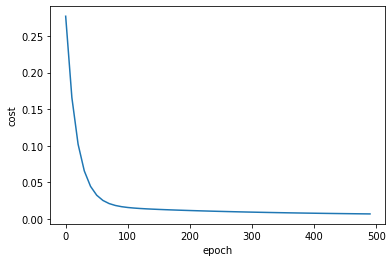

In [16]:
plt.xlabel("epoch")
plt.ylabel("cost")
plt.plot(epoch_list,cost_list)

In [17]:
# from  sklearn import preprocessing
# sx = preprocessing.MinMaxScaler()
# sy = preprocessing.MinMaxScaler()

# sx.transform([[20222,4]])
# it helps to scale the values.

In [18]:
# sy.inverse_transform([[1,0]])
# array([[167.,  32.]])

In [19]:
# s = sx.transform([[20222,4]])
# s[0][0]  , s[0]
# (17622.0, array([17622.,     0.]))

In [21]:
def predict(area,bedrooms,w,b):

  scaled_x1 = sx.transform([[area,bedrooms]])[0]
  scaled_price1 = w[0]*scaled_x1[0] + w[1]*scaled_x1[1] + b

  # scaled_x = sx.transform([[area,bedrooms]])
  # scaled_price = w[0]*scaled_x[0][0] + w[1]*scaled_x[0][1] + b
  return sy.inverse_transform([[scaled_price1]])[0][0]
  # it helps to revert back the values.
  pass
predict(2400,4,w,b)
# i think there is some mistake of sx tranform as result is not expected .

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  "X does not have valid feature names, but"


121.87126977240116